## Author :Ahmed Taha 

## Ensemble Learning

##### When you face a complex question , ask thousands of random people then aggregate their answers, In many cases you will find that this aggregated answer is better than an expert's answer.Similary,if you aggregate the predictions of a group of predictors( classifiers or regressors) you will often get better prediction than with best individual predictor 
#### For example: you can train a group of Decision Tree classifier each on random subset of the trainin set. To make predictions of all individual trees then predict the class that get the most votes thats is called a Random Forest

#### Advanced Ensemble Techniques :Bagging,stacking,Boosting and Blending ,There's algorthims based on this techniques: Random Forest,AdaBoost ,Gradient Boosting and XGB

## -------------------------------------------------------------------------------------------------------------------------------

## Random Forest HyperParameters

#### RandomForestClassifier has all the hyperparameters of a DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control the ensemble itself.

####     n_estimators = number of trees in the foreset
####       max_features = max number of features considered for splitting a node
####    max_depth = max number of levels in each decision tree
####    min_samples_split = min number of data points placed in a node before the node is split
####    min_samples_leaf = min number of data points allowed in a leaf node
####    bootstrap = method for sampling data points (with or without replacement)

## --------------------------------------------------------------------------------------------------------------------------------

# DataSet

#### Our data is Iris data set is data contains features of diffrent type of flowers
#### This types is :setosa,versicolor,virginica
#### Feature of this flowers is : SepalLengthCm,SepalWidthCm,PetalLengthCm ,PetalWidth
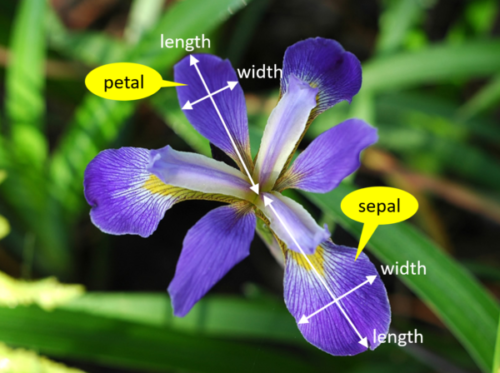

# Modules

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load The Data

In [3]:
iris=load_iris()

# Print The Features and names of flowers classes

In [4]:
print("Flower features are:",iris.feature_names)
print("The flowers classes",iris.target_names)

Flower features are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The flowers classes ['setosa' 'versicolor' 'virginica']


# Convert the data to pandas data frame and print it's shape

In [5]:
iris_DataFrame=pd.DataFrame(data=np.c_[iris["data"],iris["target"]],columns=iris.feature_names+["target"])
iris_DataFrame.shape

(150, 5)

# View The Shape of the data

In [6]:
iris_DataFrame.shape

(150, 5)

# Spliting the data into test and train

In [12]:
x_train,x_test,y_train,y_test=train_test_split(iris_DataFrame.iloc[:,:-1],iris_DataFrame.iloc[:,-1],
                                               test_size=0.2
                                               ,random_state=0)

In [13]:
print(f"xtrain shape is :{x_train.shape}\nytrain shape is:{y_train.shape}\nxtest shape is:{x_test.shape}\nytest shape is:{y_test.shape}")

xtrain shape is :(120, 4)
ytrain shape is:(120,)
xtest shape is:(30, 4)
ytest shape is:(30,)


# Model

In [19]:
rf=RandomForestClassifier()

# Using The GridSearch to get the hyperparmeters of model

In [20]:
# Create the parameter grid based on the results of random search 
param_grid = {
     'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

In [21]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

In [34]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200]})

In [35]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.9583333333333334


# Now retrain model using new parameters

In [24]:
rf2=RandomForestClassifier(n_estimators=200,bootstrap=True,max_depth=80,max_features=2
                           ,min_samples_split=8,min_samples_leaf=3
                        )
rf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)

# Evalute The new model using cross validation 

In [26]:
the_Score=cross_val_score(rf2,x_test,y_test,cv=3)
the_Score.mean()

0.9

# Confusion Matrix of the model

Text(42.0, 0.5, 'Truth')

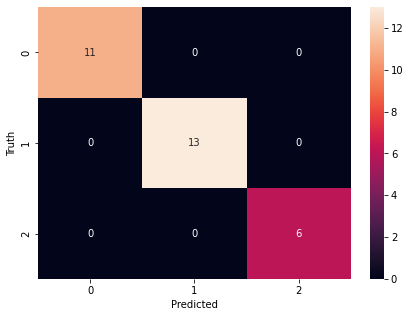

In [32]:
ypred = rf2.predict(x_test)
cm = confusion_matrix(y_test, ypred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')